# Введение

In [1]:
import warnings
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, fetch_openml,load_iris,fetch_california_housing
from sklearn.feature_selection import mutual_info_regression, f_regression, RFE, SelectFromModel, SelectKBest, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import (
RepeatedStratifiedKFold, 
cross_val_score, 
train_test_split, 
GridSearchCV,
cross_val_predict, 
learning_curve, 
validation_curve)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error,zero_one_loss
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.evaluate import bias_variance_decomp
#sharper plots
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV,
                                  SGDClassifier)

warnings.filterwarnings("ignore")

In [2]:
data_path = "D:/data/" 

## Проклятие размерности

 Проклятие размерности означает, что по мере увеличения количества объектов или измерений в наборе данных объем данных, необходимый для эффективного моделирования взаимосвязи между объектами и целевой переменной, растет экспоненциально.
Чем больше мы добавляем признаков, не увеличивая объем данных, используемых для обучения модели, тем больше увеличивается среднее расстояние между точками в пространстве признаков. Из-за такой разреженности становится гораздо проще найти удобное и совершенное, но не столь оптимальное решение для модели машинного обучения. Следовательно, модель плохо обобщает, что делает прогнозы ненадежными. Это может привести к таким проблемам, как переобучение и снижение точности.

 Чтобы смягчить проклятие размерности, можно использовать такие методы, как выбор признаков, уменьшение размерности и ансамблевые методы.

 Для примера рассмотрим 1000 случайных точек в пространствах размерности от 2 до 50. Построим график, показывающий это свойство.

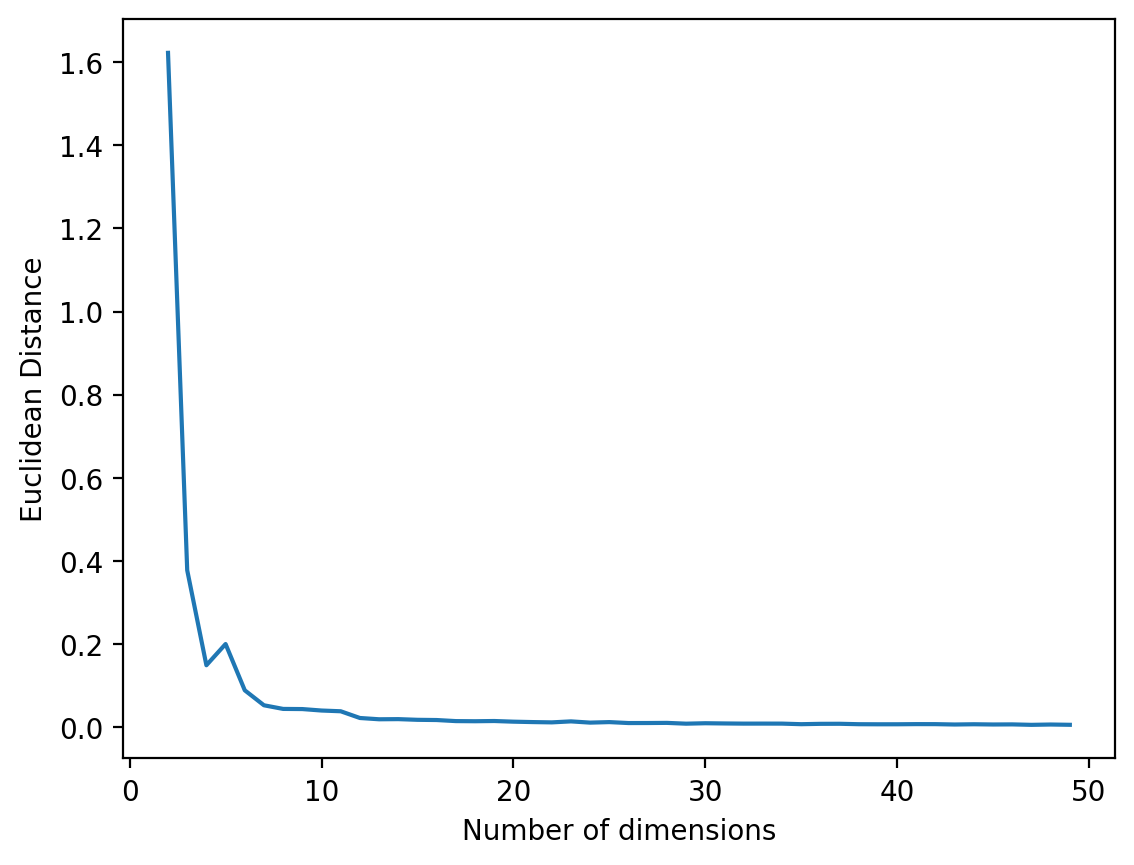

In [4]:
deltas = []
for N in range(2,50):
    # Generate 1000 random points in N dimensions.
    P = [np.random.randint(-100, 100, N) for _ in range(10000)]
    Q = np.random.randint(-100,100,N)
    diffs = [np.linalg.norm(p-Q) for p in P]
    mxd = max(diffs)
    mnd = min(diffs)
    delta = math.log10(mxd-mnd)/mnd
    deltas.append( delta )

plt.plot(range(2,50),deltas)
plt.xlabel('Number of dimensions')
plt.ylabel('Euclidean Distance')
plt.show()

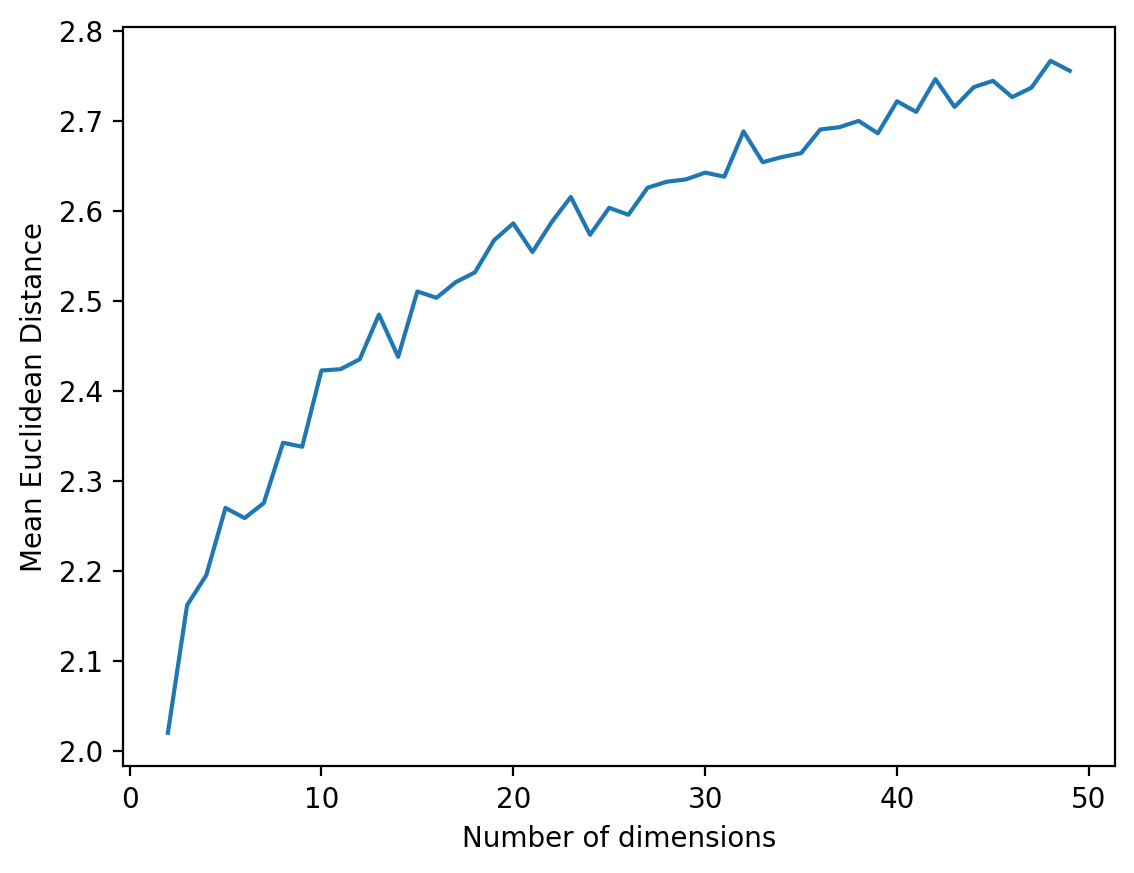

In [5]:
deltas = []
for N in range(2,50):
    # Generate 1000 random points in N dimensions.
    P = [np.random.randint(-100, 100, N) for _ in range(10000)]
    Q = np.random.randint(-100,100,N)
    diffs = [np.linalg.norm(p-Q) for p in P]
    mnd = min(diffs)
    delta = math.log10(np.mean(diffs))
    deltas.append( delta )

plt.plot(range(2,50),deltas)
plt.xlabel('Number of dimensions')
plt.ylabel('Mean Euclidean Distance')
plt.show()

Для того, чтобы уменьшить влияние проклятия размерности, используются разные техники:
 - Feature selection. Выбор наиболее релевантных функций из набора данных может помочь уменьшить размерность и повысить производительность модели.
 - Снижение размерности. Такие методы, как анализ главных компонент (PCA), линейный дискриминантный анализ (LDA) и t-SNE, могут использоваться для уменьшения размерности данных при сохранении наиболее важной информации.
 - Регуляризация. Методы регуляризации, такие как L1 и L2, могут помочь предотвратить переобучение в многомерных наборах данных путем добавления штрафного члена к функции потерь.
 - Ансамблевые методы. Объединение результатов нескольких моделей также может помочь повысить производительность в многомерных наборах данных.
 - Увеличение размера набора обучающих данных также может помочь преодолеть проклятие размерности, однако сбор большего количества данных может занять много времени и стоит дорого.
 - Генерация синтетических данных. Генерацию синтетических данных также можно использовать для увеличения размера набора данных, особенно когда сбор большего количества реальных данных невозможен.

Рассмотрим несколько вариантов решений.

### Feature selection

In [6]:
data = load_diabetes()
X = data.data
y = data.target

Самый простой способ выбора признаков - Information gain (прирост информации). Прирост информации — это статистика, которая измеряет снижение энтропии (неопределенности) для конкретной функции (таргета) путем деления данных в соответствии с этой характеристикой. Формально, он определен с помощью взаимной информации (I(X , Y) = H(X) – H(X | Y)). Она часто используется в алгоритмах дерева решений, а также имеет другие полезные свойства. Чем выше прирост информации от признака использования признака, тем полезнее он для принятия решений.


In [71]:
X_train = PCA(n_components=100).fit(X_train)
y = y_rus

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=0)
print(X_train.shape, y_test.shape)

(8000, 784) (2000,)


In [110]:
pca = PCA(n_components=100).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [111]:
X_test.shape

(2000, 100)

In [112]:
X.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [85]:
# Apply Information Gain
ig = mutual_info_regression(X_train, y_train)

# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(X_train.shape[1]):
    feature_scores[i] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print(f"Feature: {feature}, Score: {score}")

Feature: 1, Score: 0.5225817619825586
Feature: 0, Score: 0.4704300931879697
Feature: 3, Score: 0.3473680986170393
Feature: 4, Score: 0.3209373084067799
Feature: 7, Score: 0.2869413469193143
Feature: 5, Score: 0.21536107191229625
Feature: 2, Score: 0.20666366031320482
Feature: 6, Score: 0.1871245306796281
Feature: 9, Score: 0.121413021434293
Feature: 13, Score: 0.11450791455614784
Feature: 14, Score: 0.10914401313061806
Feature: 15, Score: 0.10881803882688157
Feature: 12, Score: 0.09604298102875486
Feature: 22, Score: 0.0948653527125618
Feature: 11, Score: 0.09129058730484285
Feature: 19, Score: 0.0793351025103366
Feature: 18, Score: 0.07714717260093984
Feature: 34, Score: 0.07360836608841037
Feature: 33, Score: 0.06959162897901638
Feature: 16, Score: 0.06628178551022668
Feature: 10, Score: 0.06387981418363076
Feature: 23, Score: 0.0600435825615202
Feature: 28, Score: 0.05916784505848671
Feature: 21, Score: 0.0581494504067086
Feature: 58, Score: 0.05584694098055021
Feature: 32, Score: 0

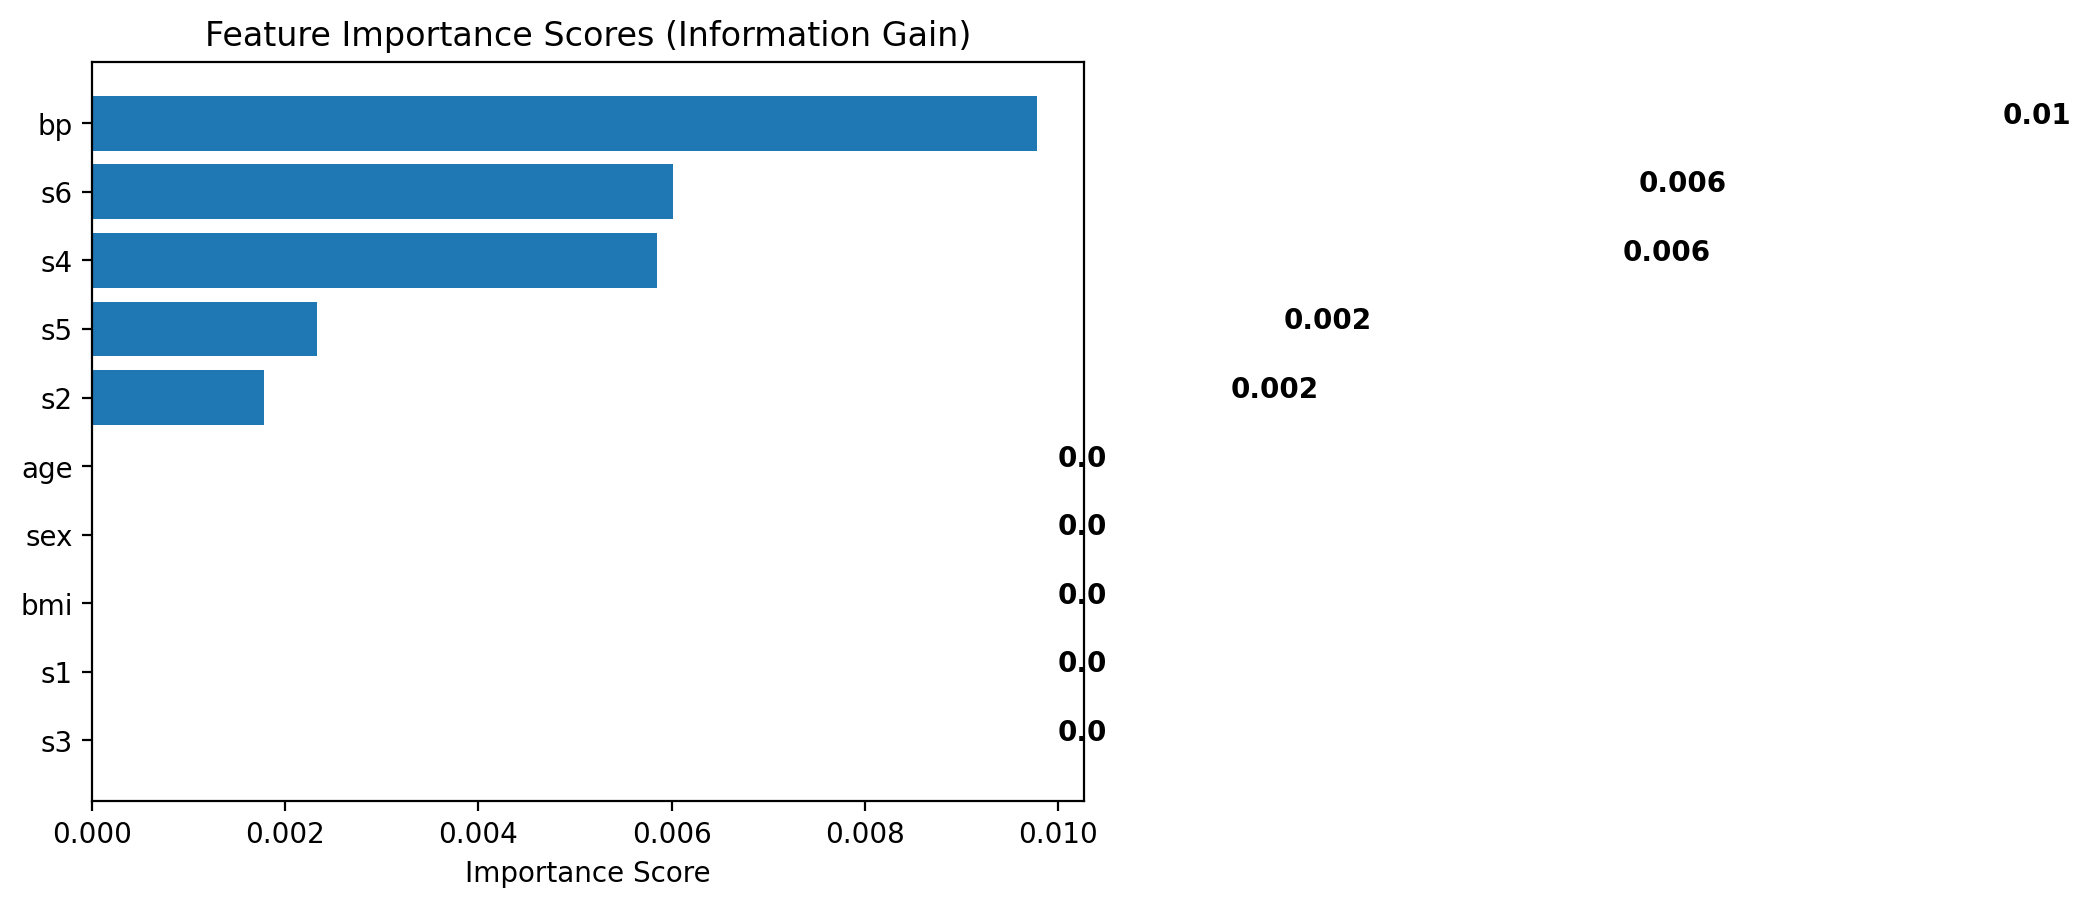

In [78]:
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

Другой вариант - F test. F-Test выполняет проверку гипотез по моделям X и Y, где X — это модель, созданная только с помощью константы, а Y — это модель, созданная с помощью константы и функции.

Ошибки в обеих моделях сравниваются и проверяется, являются ли различия в ошибках между моделями X и Y значительными или они внесены случайно:
Для каждого признака ошибка
E[(X[:, i] - mean(X[:, i])) * (y - mean(y))] / (std(X[:, i]) * std(y))
преобразуется в F-статистику, после чего рассчитывается уровень значимости признака.
Есть некоторые недостатки использования F-Test для выбора функций. F-Test проверяет и фиксирует только линейные связи между признаками и таргетами. Высококоррелированному признаку присваивается более высокий балл, а менее коррелированному признаку — более низкий балл. Однако даже  сильные нелинейные связи этот тест не выявит

In [93]:
f_statistic, p_values = f_classif(X_train, y_train)
feature_scores = {}
for i in range(100):
    feature_scores[i] = (f_statistic[i], p_values[i])

# Sort the features by importance score in descending order
sorted_features = sorted(
    feature_scores.items(), key=lambda x: x[1], reverse=True
    )

# Print the feature importance scores and the sorted features
for feature, score in sorted_features:
    print(f"Feature: {feature}, Score: {score[0]}, p-value: {score[1]}")

Feature: 1, Score: 1693.4315525963193, p-value: 0.0
Feature: 0, Score: 1173.0214421891756, p-value: 0.0
Feature: 4, Score: 688.875800336853, p-value: 0.0
Feature: 3, Score: 585.3972110193371, p-value: 0.0
Feature: 7, Score: 407.4670395574764, p-value: 0.0
Feature: 5, Score: 350.05723819116133, p-value: 0.0
Feature: 6, Score: 275.44500569405204, p-value: 0.0
Feature: 2, Score: 245.32090908029517, p-value: 0.0
Feature: 12, Score: 135.00304311245227, p-value: 7.230310868911373e-238
Feature: 14, Score: 108.38661673608402, p-value: 2.065621633693628e-192
Feature: 15, Score: 102.94338009532646, p-value: 5.6446136738171795e-183
Feature: 13, Score: 98.4806916863347, p-value: 3.343839009626598e-175
Feature: 11, Score: 82.39527018505034, p-value: 6.446071643974802e-147
Feature: 9, Score: 79.38772872081867, p-value: 1.394865303683424e-141
Feature: 16, Score: 77.82558417666223, p-value: 8.345967211893321e-139
Feature: 19, Score: 71.07299186924303, p-value: 9.340042950727269e-127
Feature: 26, Score

In [104]:
def print_feature_names(features, original_feature_names: list  | None = None):
 if features is not None:
  feature_names = [original_feature_names[int(f.strip("pixel"))] for f in features]
  print(f"Selected features: {feature_names}")
 else:
  print(f"Selected features: {fs.get_feature_names_out()}")

def select_features(X_train, y_train, X_test, function, k: int = 5, features: list  | None = None):
 # configure to select a subset of features
 fs = SelectKBest(score_func=function, k=k)
 fs.fit(X_train, y_train)
 #print_feature_names(fs.get_feature_names_out(), features)
 X_train_fs = fs.transform(X_train)
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [105]:
model = DecisionTreeClassifier()
cross_val_score(
    model, X, y, scoring="accuracy", cv=5
).mean()

0.7894

In [118]:

#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.33, random_state=42
#    )
# feature selection
X_train_fs, X_test_fs, fs = select_features(
    X_train, y_train, X_test, f_classif, k=15, features = [i for i in range(0,100)]
    )
# fit the model
model = DecisionTreeClassifier()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
mae = accuracy_score(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.779


In [119]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(
    X_train, y_train, X_test, mutual_info_regression, k=15, features = [i for i in range(0,100)])
# fit the model
model = DecisionTreeClassifier()
model.fit(X_train_fs, y_train)
# evaluate the model
y_hat = model.predict(X_test_fs)
# evaluate predictions
mae = accuracy_score(y_test, y_hat)
print('MAE: %.3f' % mae)

MAE: 0.792


А что, если взять все признаки?

In [120]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# evaluate the model
y_hat = model.predict(X_test)
# evaluate predictions
mae = accuracy_score(y_test, y_hat)
print('MAE: %.3f' % mae)

MAE: 0.755


Как же перейти от простой оценки важно стьи признаков к поиску такого подмножества, которое приведет к наибольшей точности модели?
Можно использовать рекурсиыввный выбор признаков (Recursive feature selection, или RFE).
RFE работает путем поиска подмножества признаков, начиная со всех признаков в наборе обучающих данных и успешно удаляя самые незнвачимые, пока не останется желаемое количество.

Это достигается путем подбора алгоритма машинного обучения, используемого в ядре модели, ранжирования признаков по важности, отбрасывания наименее важные признаки и повторной настройки модели. Этот процесс повторяется до тех пор, пока не останется заданное количество признаков. Характеристики оцениваются либо с использованием предоставленной модели машинного обучения (например, некоторые алгоритмы, такие как деревья решений, предлагают оценки важности), либо с использованием статистического метода, такого как f-score или IG.

In [25]:
# scaler = StandardScaler()
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
model = LinearRegression()
#pipeline = Pipeline(steps=[('sc',scaler),('s',rfe),('m',model)])
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
pipeline.fit(X_train, y_train)
print_feature_names(rfe.get_feature_names_out(), data.feature_names)
# evaluate the model
y_hat = pipeline.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
print('MAE: %.3f' % mae)

Selected features: ['age', 'bmi', 'bp', 's2', 's5']
MAE: 43.665


### PCA
PCA ищет линейную комбинацию переменных, чтобы мы могли извлечь максимальную дисперсию из них. По завершении этого процесса он удаляет ее и ищет другую линейную комбинацию (фактор), которая дает объяснение максимальной пропорции оставшейся дисперсии, что приводит к ортогональным факторам. Это повторяется столько раз, чтобы достигнуть целевого числа объясненной дисперсии или числа факторов.

In [26]:
scaler = StandardScaler()


Доп.задание : Запустите предыдущий метод с учетом скейлинга. Поменяется ли результат?

In [35]:
pca = PCA(n_components = 5)
pipeline = Pipeline(steps=[('sc', scaler), ('pca',pca),('m',model)])
# evaluate model
pipeline.fit(X_train, y_train)
pcas = " ".join(f"{i:.2}" for i in pca.explained_variance_ratio_)
print(f"Explained {pcas} ({pca.explained_variance_ratio_.sum():.2f}) ratio of variance")
# evaluate the model
y_hat = pipeline.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
print('MAE: %.3f' % mae)

Explained 0.39 0.15 0.12 0.099 0.069 (0.83) ratio of variance
MAE: 41.204


Почему важно использование скейлинга перед проведением PCA?
Если один объект варьируется больше, чем другие, только из-за их соответствующих масштабов, PCA определит, что такой объект доминирует в направлении главных компонентов.

In [37]:
pca = PCA(n_components = 5)
pipeline = Pipeline(steps=[('pca',pca),('m',model)])
# evaluate model
pipeline.fit(X_train, y_train)
pcas = " ".join(f"{i:.2}" for i in pca.explained_variance_ratio_)
print(f"Explained {pcas} ({pca.explained_variance_ratio_.sum():.2f}) ratio of variance")
# evaluate the model
y_hat = pipeline.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, y_hat)
print('MAE: %.3f' % mae)

Explained 0.39 0.15 0.12 0.099 0.068 (0.83) ratio of variance
MAE: 41.230


 Какой метод наиболее страдает от проклятия размерности?
 KNN.

 Покажем это.

Рассмотрим набор MNIST - набор рукописных чисел от 0 до 9. Это один из классических наборов для компьютернорго зроения, состоящий из 100 тысяч черно-белых изображений 28х28. Однако матрицы можно и вытянуть в вектор, чтобы предсказывать класс в табличном формате. Тогда мы получим пространство признаков размера 784!

In [38]:
mnist = fetch_openml('mnist_784', cache=False)

X = mnist["data"].astype('float64')
X.reset_index()
y = mnist["target"].astype('int64')
y.reset_index()

print("\nNo. of Samples: ", X.shape)
print("No. of Labels: ", y.shape)


No. of Samples:  (70000, 784)
No. of Labels:  (70000,)


Так выглядит набор данных в табличном виде

In [39]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Рассмотрим случайный семпл в данных (преобразовав обратно в матрицу)

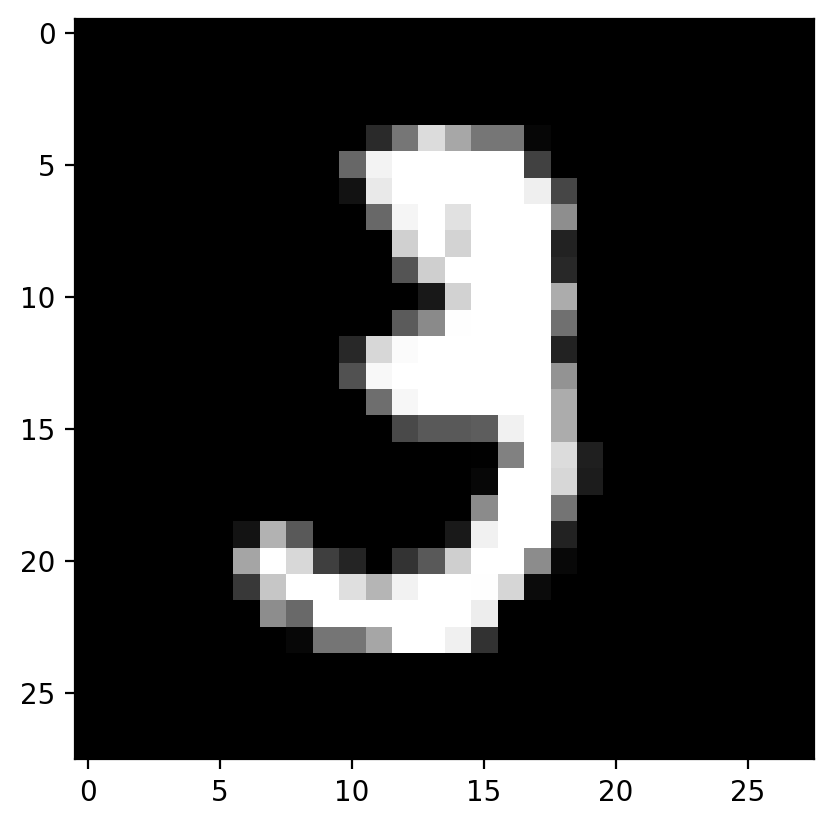

In [41]:
random_digit = X.loc[10,:].values

random_digit_image = random_digit.reshape(28, 28)

plt.imshow(random_digit_image, cmap = 'gray', interpolation="nearest")
#plt.axis("off")
plt.show()


Отнормируем

In [42]:
X /= 255.0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Заодно с обучением модели вспомним о поиске гиперпараметров. Что это такое?

param_grid = {'n_neighbors': [3, 4, 5, 9], 'p': [1, 2, 1000], 'weights': ["uniform", "distance"]}


knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Так как данных очень много, сделаем равномерно засемплим 1000 точек. В общем случае это плохая практика. Почему?

In [57]:
random_indices = np.random.choice(X.index, 10000, replace=False)
X_rus = X.loc[random_indices]
y_rus = y.loc[random_indices]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=0)
print(X_train.shape, y_test.shape)

(8000, 784) (2000,)


In [59]:
param_grid = {'n_neighbors': [3, 4], 'p': [2], 'weights': ["distance"]}


knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Score: nan
Optimal Hyperparameter Values:  {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}




In [60]:
%%time
knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  1.0
CPU times: total: 3.47 s
Wall time: 1.01 s


In [61]:
%%time

y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

CPU times: total: 4.48 s
Wall time: 1.23 s


array([[748,   0,   0,   1,   0,   0,  14,   2,   0,   0],
       [  0, 904,   1,   0,   2,   0,   0,   1,   0,   1],
       [  6,  19, 725,   5,   3,   2,   5,  21,   5,   0],
       [  0,   0,   6, 783,   1,  12,   1,  10,   7,  12],
       [  1,  12,   1,   1, 729,   1,   0,   5,   0,  31],
       [  6,   3,   0,  14,   4, 678,   8,   1,   3,   6],
       [  5,   2,   2,   1,   0,   5, 780,   0,   0,   0],
       [  1,   9,   1,   1,   5,   0,   0, 817,   1,  16],
       [  5,  15,   6,  20,   5,  25,   3,   1, 672,  19],
       [  6,   6,   3,   7,  17,   6,   0,  40,   1, 696]], dtype=int64)

In [62]:

y_test_predicted = knn.predict(X_test)

test_accuracy_knn = np.mean(y_test_predicted == y_test)
print("\nTraining Accuracy: ", test_accuracy_knn)


Training Accuracy:  0.951


In [63]:
%%time

# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.951

No. of correct predictions (Test): 1902/2000

Confusion Matrix (Test Data):
 [[204   0   1   0   0   0   0   0   0   1]
 [  0 202   1   0   0   0   0   2   0   0]
 [  1   5 202   0   0   2   1   3   0   0]
 [  0   1   1 195   0   4   0   2   5   2]
 [  0   2   0   0 184   0   1   1   0   7]
 [  2   1   0   6   1 162   0   0   1   4]
 [  0   0   0   0   0   2 190   0   0   0]
 [  0   2   1   0   0   0   0 196   0   4]
 [  1   6   1   4   0   5   0   0 171   0]
 [  2   2   0   0   1   1   0   8   0 196]]
CPU times: total: 1.78 s
Wall time: 527 ms


In [64]:
pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,204,0,1,0,0,0,0,0,0,1,206
1,0,202,1,0,0,0,0,2,0,0,205
2,1,5,202,0,0,2,1,3,0,0,214
3,0,1,1,195,0,4,0,2,5,2,210
4,0,2,0,0,184,0,1,1,0,7,195
5,2,1,0,6,1,162,0,0,1,4,177
6,0,0,0,0,0,2,190,0,0,0,192
7,0,2,1,0,0,0,0,196,0,4,203
8,1,6,1,4,0,5,0,0,171,0,188


Попробуем уменьшить влияние проклятия размерности с помощью уменьшения размерности, использовав метод PCA.

In [65]:
%%time
pca = PCA(n_components=0.95)
pca.fit(X_train)

print("Number of Principle Components: ", pca.n_components_)

Number of Principle Components:  151
CPU times: total: 2.58 s
Wall time: 824 ms


In [66]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [67]:
%%time


knn_pca = KNeighborsClassifier(n_neighbors=4, p=2, weights="distance")

knn_pca.fit(X_train_pca, y_train)


y_test_predicted_pca_knn = knn_pca.predict(X_test_pca)
print("KNN (PCA): Test Accuracy: ", accuracy_score(y_test, y_test_predicted_pca_knn))

print("\nKNN (PCA): Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_pca_knn))

print("\nKNN (PCA): Classification Report:")
print(classification_report(y_test, y_test_predicted_pca_knn))

print("\n")

KNN (PCA): Test Accuracy:  0.9555

KNN (PCA): Test Confusion Matrix:
[[203   0   1   0   0   0   1   1   0   0]
 [  0 202   1   0   0   0   0   2   0   0]
 [  0   3 204   0   0   3   1   3   0   0]
 [  0   1   0 198   0   3   0   2   4   2]
 [  0   2   0   0 184   1   1   1   0   6]
 [  2   0   0   7   0 164   0   1   0   3]
 [  0   0   0   0   0   2 190   0   0   0]
 [  0   2   0   0   0   0   0 197   0   4]
 [  1   6   1   4   0   4   0   0 172   0]
 [  2   2   0   0   0   1   0   8   0 197]]

KNN (PCA): Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.93      0.99      0.96       205
           2       0.99      0.95      0.97       214
           3       0.95      0.94      0.95       210
           4       1.00      0.94      0.97       195
           5       0.92      0.93      0.92       177
           6       0.98      0.99      0.99       192
           7       0.92      0.9

Мы видим, что после уменьшения размерности мы можем снизить стоимость расчета расстояния в K-NN, что приводит к значительному сокращению времени обучения. При этом мы не потеряли в точности, а даже выиграли!

Для сравнения времени обучения рассмотрим метод, построенный не на расстоянии - случайный лес. Эта модель будет страдать от проклятия размерности в терминах времени меньше.

In [68]:
%%time

forest_clf = RandomForestClassifier(n_estimators=1000, criterion="gini", 
                                    max_depth=32, class_weight="balanced", oob_score=True, verbose=1, n_jobs=-1)

forest_clf.fit(X_train, y_train)

y_test_predicted_rf = forest_clf.predict(X_test)
print("Random Forest: Test Accuracy: ", accuracy_score(y_test, y_test_predicted_rf))

print("\nRandom Forest: Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_rf))

print("\nRandom Forest: Classification Report:")
print(classification_report(y_test, y_test_predicted_rf))

print("\n")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s


Random Forest: Test Accuracy:  0.9565

Random Forest: Test Confusion Matrix:
[[203   0   1   0   1   1   0   0   0   0]
 [  0 200   3   0   0   0   0   1   0   1]
 [  2   0 205   0   1   0   3   0   3   0]
 [  0   1   2 195   0   4   1   1   3   3]
 [  0   0   1   0 187   0   1   1   1   4]
 [  0   0   0   6   1 168   0   1   0   1]
 [  0   0   0   0   0   2 189   0   1   0]
 [  0   1   2   1   0   0   0 192   0   7]
 [  0   1   1   1   1   2   1   1 179   1]
 [  2   1   2   2   1   0   0   5   2 195]]

Random Forest: Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       206
           1       0.98      0.98      0.98       205
           2       0.94      0.96      0.95       214
           3       0.95      0.93      0.94       210
           4       0.97      0.96      0.97       195
           5       0.95      0.95      0.95       177
           6       0.97      0.98      0.98       192
           7       0

[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [69]:
%%time

forest_clf = RandomForestClassifier(n_estimators=1000, criterion="gini", 
                                    max_depth=32, class_weight="balanced", oob_score=True, verbose=1, n_jobs=-1)

forest_clf.fit(X_train_pca, y_train)

y_test_predicted_rf = forest_clf.predict(X_test_pca)
print("Random Forest: Test Accuracy: ", accuracy_score(y_test, y_test_predicted_rf))

print("\nRandom Forest: Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_rf))

print("\nRandom Forest: Classification Report:")
print(classification_report(y_test, y_test_predicted_rf))

print("\n")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   24.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s


Random Forest: Test Accuracy:  0.935

Random Forest: Test Confusion Matrix:
[[201   0   1   0   1   0   0   1   0   2]
 [  0 199   2   1   0   0   1   1   1   0]
 [  2   0 204   1   1   0   2   0   4   0]
 [  1   1   2 192   0   1   3   1   5   4]
 [  0   1   1   0 184   0   2   3   2   2]
 [  3   0   0   9   4 155   0   2   2   2]
 [  1   0   1   1   0   2 187   0   0   0]
 [  0   2   3   0   1   0   0 192   1   4]
 [  1   3   0   8   2   3   0   1 170   0]
 [  3   2   1   2   6   0   0   8   2 186]]

Random Forest: Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       206
           1       0.96      0.97      0.96       205
           2       0.95      0.95      0.95       214
           3       0.90      0.91      0.91       210
           4       0.92      0.94      0.93       195
           5       0.96      0.88      0.92       177
           6       0.96      0.97      0.97       192
           7       0.

[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [234]:
X_train_big, X_test_big, y_train_big, y_test_big = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train_big.shape, y_test_big.shape)

(56000, 784) (14000,)


%%time

forest_clf = RandomForestClassifier(n_estimators=1000, criterion="gini", 
                                    max_depth=32, class_weight="balanced", oob_score=True, verbose=1, n_jobs=-1)

forest_clf.fit(X_train_big, y_train_big)

y_test_predicted_rf = forest_clf.predict(X_test_big)
print("Random Forest: Test Accuracy: ", accuracy_score(y_test_big, y_test_predicted_rf))

print("\nRandom Forest: Test Confusion Matrix:")
print(confusion_matrix(y_test_big, y_test_predicted_rf))

print("\nRandom Forest: Classification Report:")
print(classification_report(y_test_big, y_test_predicted_rf))

print("\n")

Как видно, обучение произошло гораздо быстрее, при этом точность алгоритма даже выше, чем у KNN

## Недообучение и переобучение
Ошибка прогнозирования (E) для любого алгоритма машинного обучения может быть разбита на три части:

1. Сдвиг/смещение (bayes) модели
2. Дисперсия (variance) модели
3. Шум/Неустранимая ошибка (Noise)

В общем:
  Error (Model) = Variance + Bias + Irreducible Error


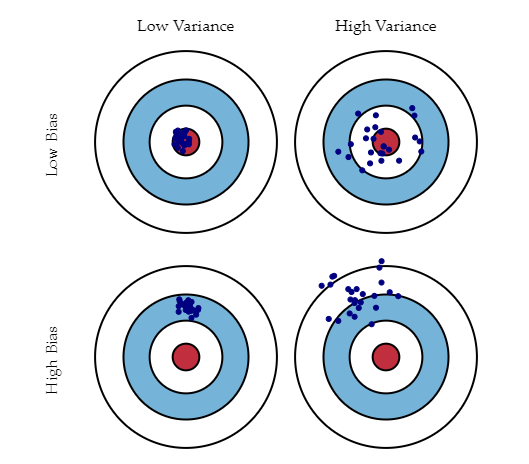

**Дисперсия** отражает, насколько изменится ваша модель, если вы тренируетесь на другом обучающем наборе. Насколько «чрезмерно специализирован» ваш классификатор для конкретного обучающего набора (переобучение)? Если у нас есть наилучшая возможная модель для наших обучающих данных, насколько мы далеки от среднего классификатора?

**Смещение**: Какую внутреннюю ошибку вы получаете от своей модели даже при бесконечных обучающих данных? Это связано с тем, что ваша модель «смещена» к определенному типу решения (например, линейному). Другими словами, вашей модели присуща предвзятость.

**Шум**: Насколько велик собственный шум данных? Эта ошибка измеряет неоднозначность из-за вашего распределения данных и представления объектов. Вы никогда не сможете победить это, это аспект данных.

Как определить, что модель переобучается/недообучается? Рассмотрим сопоставление тренировочной и тестовой ошибки в зависимости от времени.

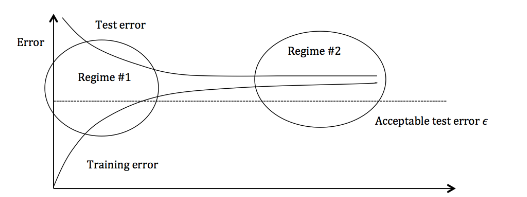

На графике выше показаны ошибка обучения и ошибка теста, и их можно разделить на два основных режима. В первом режиме (в левой части графика) ошибка обучения ниже желаемого порога ошибки (обозначается ϵ
), но ошибка теста значительно выше. Во втором режиме (в правой части графика) ошибка теста очень близка к ошибке обучения, но обе они превышают желаемый допуск ϵ.

Первый режим соответствует высокой дисперсии . Во втором же наблюдается высокий сдвиг, что означает, что модель нашла недостаточно общие зависимости (переобучилась)

Покажем пример кривых обучения на основе данных о потребителях связи

### Кривые обучения

In [7]:
data_path = "D:/data/machine_learning/" 
data = pd.read_csv(data_path + "telecom_churn.csv").drop("State", axis=1)
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

y = data["Churn"].astype("int").values
X = data.drop("Churn", axis=1).values

In [9]:
alphas = np.logspace(-2, 0, 20)
sgd_logit = SGDClassifier(loss="squared_error", n_jobs=-1, random_state=17, max_iter=5)
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree=2)),
        ("sgd_logit", sgd_logit),
    ]
)
val_curve_train, val_curve_test = validation_curve(
    estimator=pipeline,
    X=X,
    y=y,
    param_name="sgd_logit__alpha",
    param_range=alphas,
    cv=5,
    scoring="roc_auc"
)

In [25]:
def plot_with_err(params,fun_cv, label):
    mus = np.mean(fun_cv, axis=-1)
    stds = np.std(fun_cv, axis=-1)
    plt.plot(params, mus, label=label)
    plt.fill_between(params, mus - stds, mus + stds, alpha=0.2)
    #plt.fill_between(params, mus - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
    # plt.errorbar(params, mus, stds, linestyle='None', marker='^', label=label)
    

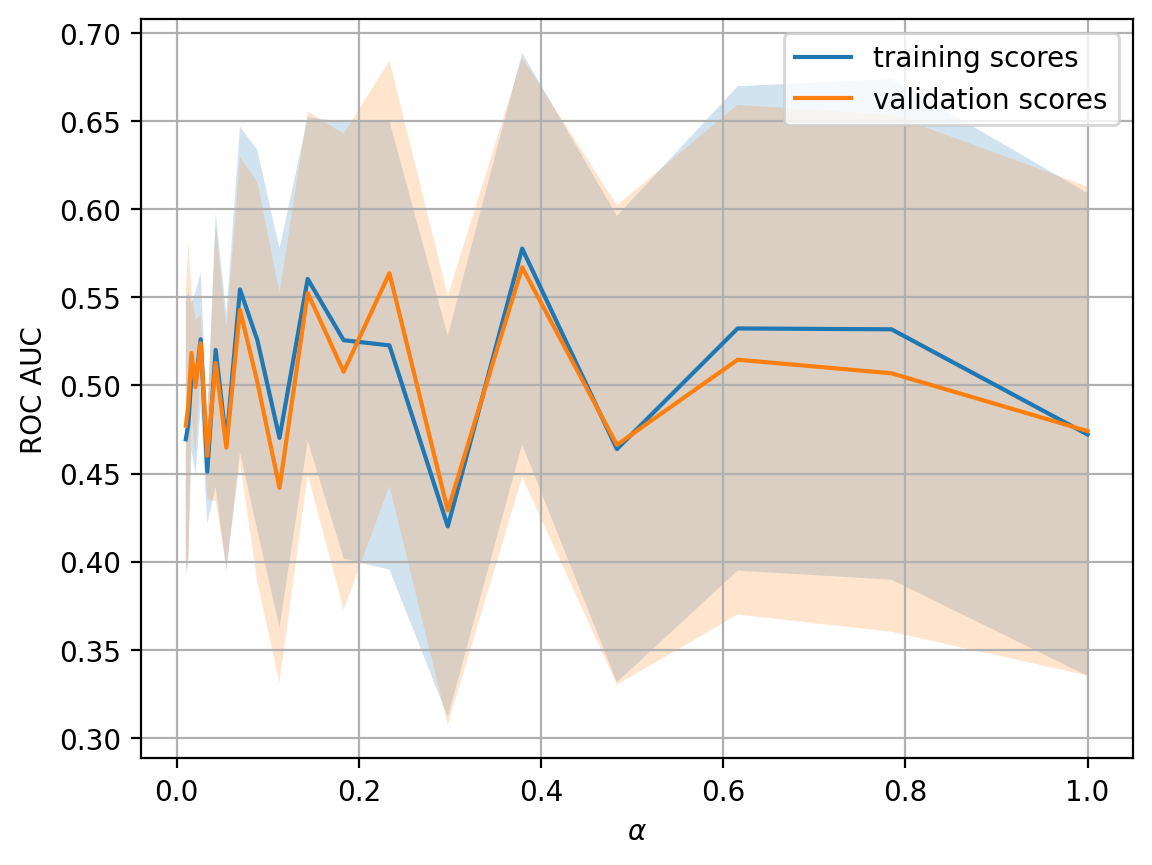

In [26]:
plot_with_err(alphas, val_curve_train, label="training scores")
plot_with_err(alphas, val_curve_test, label="validation scores")
plt.xlabel(r"$\alpha$")
plt.ylabel("ROC AUC")
plt.legend()
plt.grid(True)

Для простых моделей ошибки обучения и проверки близки и велики. Это говорит о том, что модель недообучена, то есть не имеет достаточного количества параметров.

Для очень сложных моделей ошибки обучения и проверки существенно различаются. Это можно объяснить переобучением. Когда параметров слишком много или регуляризация недостаточно строгая (как в нашем случае), модель может «отвлечься» на шум в данных и потерять общую зависимость.

С другой стороны, как построить кривые обучения и оценить зависимость ошибок от количества данных?

Поскольку новые данные могут быть недоступны, разумно варьировать размер обучающей выборки и посмотреть, как качество решения зависит от количества обучающих данных. В сложных задачах это реализуется с помощью нескольких проходов по датасету.

Идея проста: мы отображаем ошибку как функцию количества примеров, использованных при обучении. Параметры модели фиксируются заранее.

In [27]:
def plot_learning_curve(degree=2, alpha=0.01):
    train_sizes = np.linspace(0.05, 1, 20)
    pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "sgd_logit",
                SGDClassifier(n_jobs=-1, random_state=17, alpha=alpha, max_iter=5),
            ),
        ]
    )
    train_samples_nums, val_loss_train, val_loss_test = learning_curve(
        pipeline, X, y, train_sizes=train_sizes, cv=5, scoring="roc_auc"
    )
    plot_with_err(train_samples_nums, val_loss_train, label="training scores")
    plot_with_err(train_samples_nums, val_loss_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("ROC AUC")
    plt.legend()
    plt.grid(True)

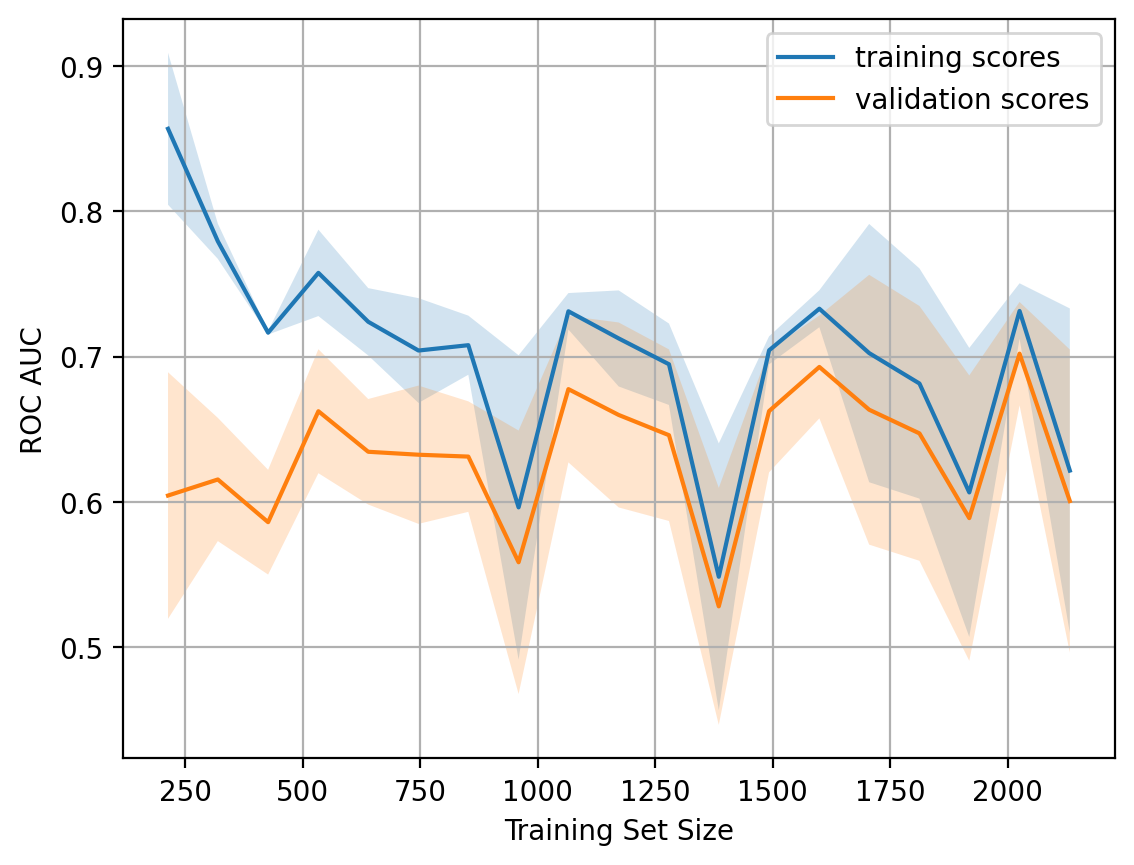

In [28]:
plot_learning_curve(degree=2, alpha=10)

Что произойдет, если мы уменьшим коэффициент регуляризации до 0,05?


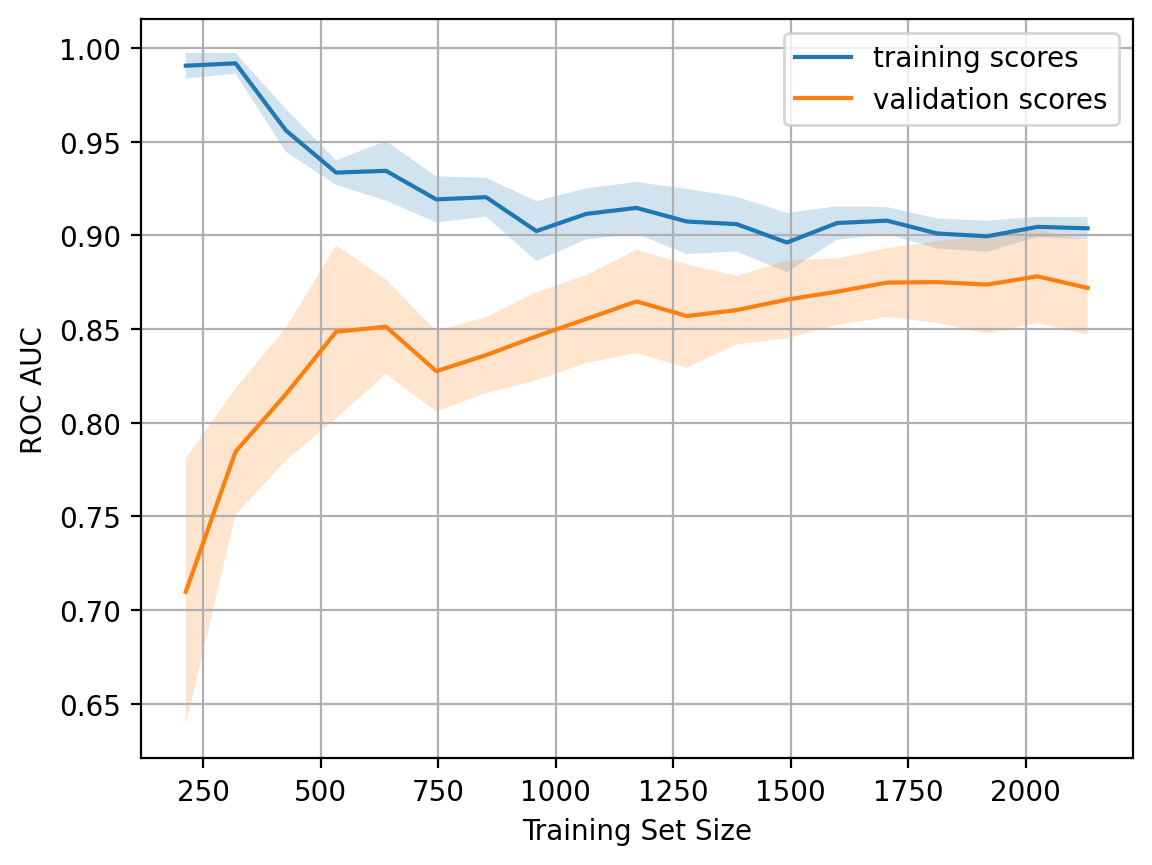

In [29]:
plot_learning_curve(degree=2, alpha=0.05)

Как мы видим, кривые постепенно сходятся, что значит хорошее качество. При этом мы можем еще улучшить качество, добавив больше данных. Уменьшим регуляризацию еще больше. Какой вывод можно сделать по этому графику?

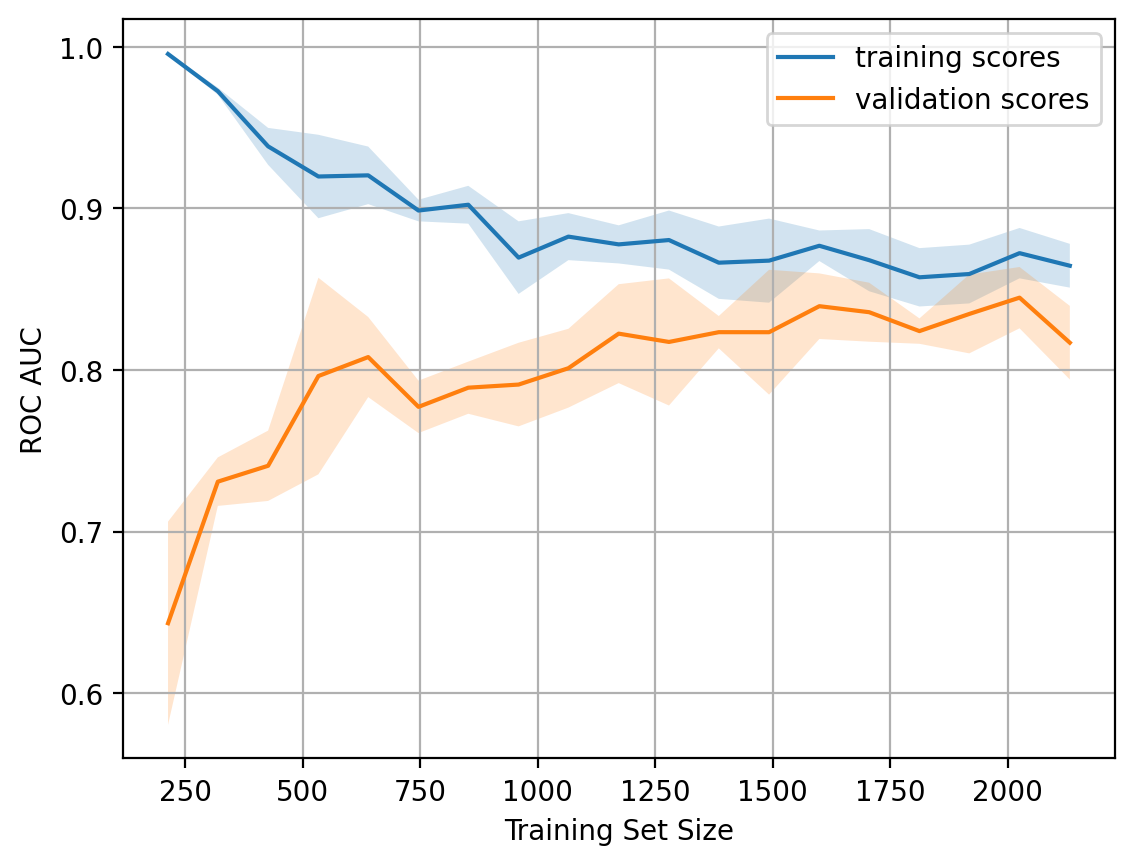

In [30]:
plot_learning_curve(degree=2, alpha=1e-4)

### Разложение ошибки

Теперь посмотрим, как можно разложить ошибку.

Рассмотрим разделение ошибки на примере данных о продаже зданий в Калифорнии

In [40]:
data = fetch_california_housing()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Model definition
model = LinearRegression()
# Estimation of bias and variance using bias_variance_decomp
#Note here we are using loss as 'mse' and setting default bootstrap num_rounds to 200
mse, bias, var = bias_variance_decomp(
    model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=123
    )
y_pred=model.predict(X_test)
# summarize results
print('MSE from bias_variance lib [avg expected loss]: %.3f' % mse)
print('Avg Bias: %.3f' % bias)
print('Avg Variance: %.3f' % var)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 0.527
Avg Bias: 0.525
Avg Variance: 0.002
Mean Square error by Sckit-learn lib: 0.527


В результате наших расчетов из приведенного выше очевидно, что общая ошибка = смещение + дисперсия, мы также могли видеть, что MSE, рассчитанная на основе библиотеки sckit, почти равна той, что мы получили их mlextend.

In [42]:
lasso_model = Lasso(alpha=0.05)
error_reg_las, bias_reg_las, var_reg_las = bias_variance_decomp(
    lasso_model, X_train, y_train, X_test, y_test, loss='mse', random_seed=123
    )

y_pred=lasso_model.predict(X_test)
print('MSE from bias_variance lib [avg expected loss]: %.3f' % error_reg_las)
print('Avg Bias: %.3f' % bias_reg_las)
print('Avg Variance: %.3f' % var_reg_las)
print('Mean Square error by Sckit-learn lib: %.3f' % mean_squared_error(y_test,y_pred))

MSE from bias_variance lib [avg expected loss]: 0.555
Avg Bias: 0.554
Avg Variance: 0.001
Mean Square error by Sckit-learn lib: 0.554


Можно заметить, чтопосле регуляризации смещение уменьшилось, дисперсия немного увеличилась, а общая средняя ошибка также снизилась.

Что же для классификации?
Для простоты рассмотрим 0–1 loss:
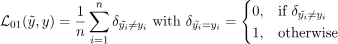

Смещение и дисперсия для потерь 0–1 следующие.

Смещение равно 1, если основной прогноз не согласуется с истинной меткой y, и 0 в противном случае:
Bias = 1 if (ŷ ≠ E[ŷ]) else 0




Дисперсия определяется как вероятность того, что предсказанная метка не соответствует основному предсказанию:

Дисперсия = P(ŷ ≠ E[ŷ])

В качестве примера рассмотрим датасет Iris

In [ ]:
data = pd.read_csv(data_path + "telecom_churn.csv").drop("State", axis=1)
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

y = data["Churn"].astype("int").values
X = data.drop("Churn", axis=1).values

degree = 2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)
pipeline = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "tree",
                DecisionTreeClassifier(random_state=123),
            ),
        ]
    )
clf_dt = DecisionTreeClassifier(random_state=123)
#clf_dt.fit(X_train,y_train)
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        pipeline, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))


### After Pruning ###
pipeline = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "tree",
                DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123),
            ),
        ]
    )
pipeline.fit(X_train,y_train)
y_pred=pipeline.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        pipeline, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss--After pruning: %.3f' % avg_expected_loss)
print('Average bias--After pruning: %.3f' % avg_bias)
print('Average variance--After pruning: %.3f' % avg_var)
print('Sklearn 0-1 loss--After pruning: %.3f' % zero_one_loss(y_test,y_pred))

In [50]:
data = pd.read_csv(data_path + "telecom_churn.csv").drop("State", axis=1)
data["International plan"] = data["International plan"].map({"Yes": 1, "No": 0})
data["Voice mail plan"] = data["Voice mail plan"].map({"Yes": 1, "No": 0})

y = data["Churn"].astype("int").values
X = data.drop("Churn", axis=1).values

degree = 2
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)
pipeline = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "tree",
                DecisionTreeClassifier(random_state=123),
            ),
        ]
    )
clf_dt = DecisionTreeClassifier(random_state=123)
#clf_dt.fit(X_train,y_train)
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_dt, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))


### After Pruning ###
clf_dt_prnd = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=123)
clf_dt_prnd.fit(X_train,y_train)
y_pred=clf_dt_prnd.predict(X_test)

avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_dt_prnd, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss--After pruning: %.3f' % avg_expected_loss)
print('Average bias--After pruning: %.3f' % avg_bias)
print('Average variance--After pruning: %.3f' % avg_var)
print('Sklearn 0-1 loss--After pruning: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.101
Average bias: 0.055
Average variance: 0.066
Sklearn 0-1 loss: 0.086
Average expected loss--After pruning: 0.091
Average bias--After pruning: 0.074
Average variance--After pruning: 0.029
Sklearn 0-1 loss--After pruning: 0.074


Выше мы видим, что общиая ожидаемая ошибка = сумма смещения + дисперсии и прунинг имеет некоторый эффект на уменьшение дисперсии.

Модель случайного леса обычно помогает уменьшить дисперсию (уменьшить оверфиттинг). Давайте также попробуем увидеть результаты для модели RF.

In [53]:
#clf_RF = RandomForestClassifier(max_depth=4, random_state=0)
#clf_RF.fit(X_train,y_train)

pipeline = Pipeline(
        [
            ("poly", PolynomialFeatures(degree=degree)),
            (
                "tree",
                RandomForestClassifier(max_depth=5, random_state=0),
            ),
        ]
    )
pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        pipeline, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.066
Average bias: 0.062
Average variance: 0.021
Sklearn 0-1 loss: 0.066


Можно заметить, что RF действительно помогает уменьшить дисперсию набора данных. На самом деле RF - хороший пример беггинга.
При беггинге (Bootstrap Aggregating) многочисленные повторы исходного набора данных создаются с использованием случайного выбора с заменой. Каждый производный набор данных затем используется для построения новой модели, и модели собираются в ансамбль. Чтобы сделать прогноз, все модели в ансамбле опрашиваются и их результаты усредняются.

В случайных лесах смещение полной модели эквивалентно смещению одного дерева решений (которое само по себе имеет высокую дисперсию). Создав множество таких деревьев, по сути, «лес», а затем усреднив их, дисперсию окончательной модели можно значительно уменьшить по сравнению с дисперсией одного дерева. На практике единственным ограничением размера леса является время вычислений, поскольку можно обучить бесконечное количество деревьев без увеличения систематической ошибки и с постоянным (хотя и асимптотически уменьшающимся) уменьшением дисперсии.

Кроме того, как уже было показано, если мы попытаемся настроить гиперпараметры с помощью GridSearchCV или K-fold, мы можем в конечном итоге значительно уменьшить дисперсию.

Давайте также попробуем заглянуть в KNN.

Обычно модель KNN с низкими значениями k имеет высокую дисперсию и низкое смещение, но по мере увеличения k дисперсия уменьшается, а смещение увеличивается.


In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train,y_train)
y_pred=clf_knn.predict(X_test)


avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        clf_knn, X_train, y_train, X_test, y_test,
        loss='0-1_loss',
        random_seed=123)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)
print('Sklearn 0-1 loss: %.3f' % zero_one_loss(y_test,y_pred))

Average expected loss: 0.182
Average bias: 0.130
Average variance: 0.089
Sklearn 0-1 loss: 0.140


Можно заметить, что смещение относительно велико [для k=3] по сравнению с дисперсией. И ожидаемые  ошибки больше, чем у модели RF.

In [47]:
ks = [i for i in range(1,21)]
model = KNeighborsClassifier()

val_curve_train, val_curve_test = validation_curve(
    estimator=model,
    X=X,
    y=y,
    param_name="n_neighbors",
    param_range=ks,
    cv=5,
    scoring="accuracy"
)

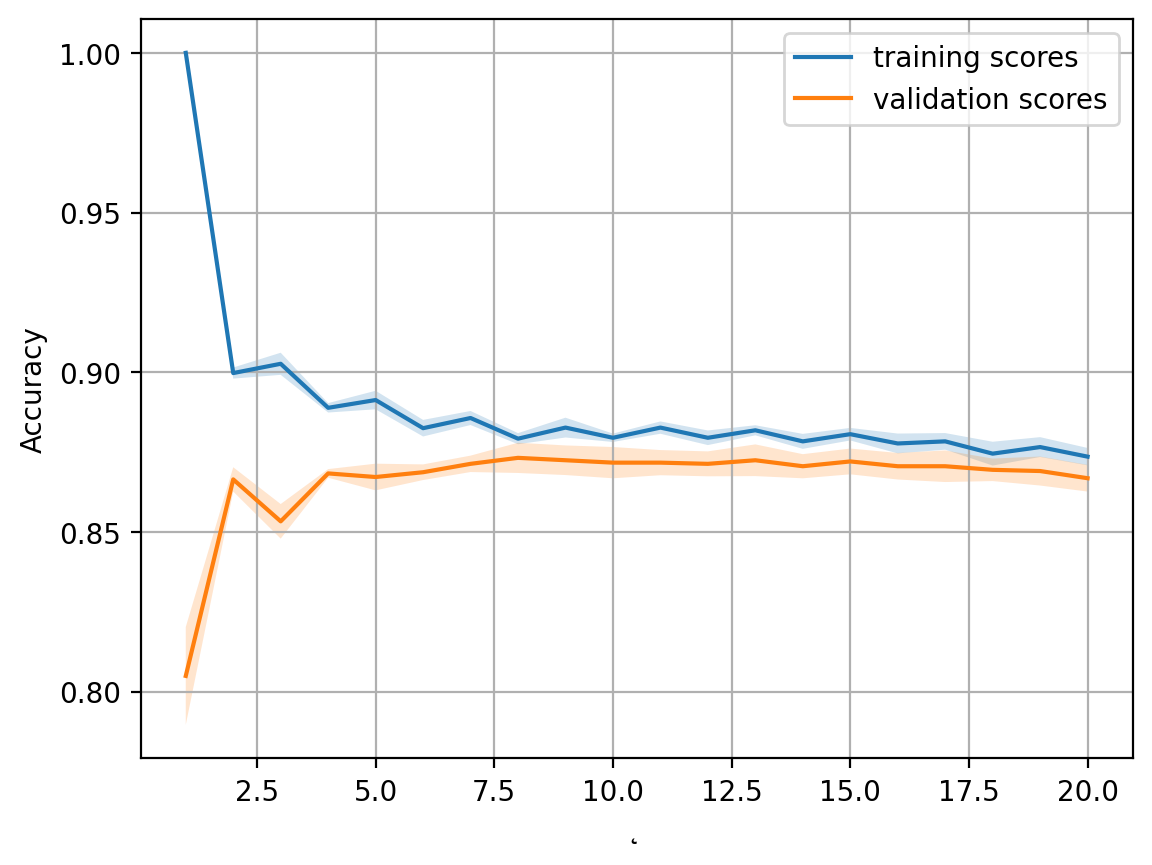

In [48]:
plot_with_err(ks, val_curve_train, label="training scores")
plot_with_err(ks, val_curve_test, label="validation scores")
plt.xlabel(r"$\k$")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

Для различных значений k в kNN давайте также рассмотрим, какими будут наши ошибки, смещение и дисперсии.

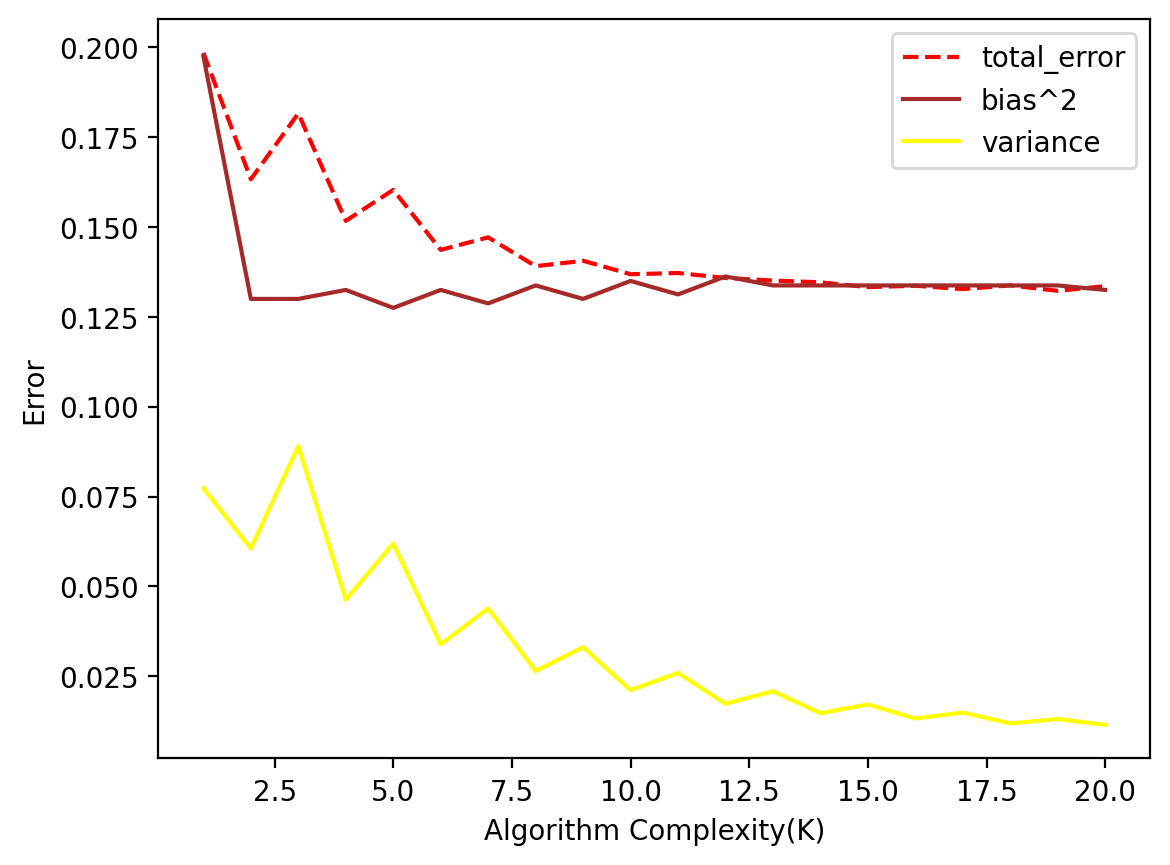

In [49]:
bias_KnnClass, var_KnnClass,error_KnnClass, = [], [], []
for k in range(1,21):
    clf_knn = KNeighborsClassifier(n_neighbors=k)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(clf_knn, X_train, y_train, X_test, y_test, loss='0-1_loss', random_seed=123)
    bias_KnnClass.append(avg_bias)
    var_KnnClass.append(avg_var)
    error_KnnClass.append(avg_expected_loss)
plt.plot(range(1,21), error_KnnClass, 'red', label = 'total_error',linestyle='dashed')
plt.plot(range(1,21), bias_KnnClass, 'brown', label = 'bias^2')
plt.plot(range(1,21), var_KnnClass, 'yellow', label = 'variance')
plt.xlabel('Algorithm Complexity(K)')
plt.ylabel('Error')
plt.legend()

Как и ожидалось, при увеличении k уменьшается дисперсия (модель переобучается) и немного увеличивается смещение

*Дополнительное задание*: Проверить те же свойства на датасете Iris

In [322]:
#iris = load_iris()
#X = iris.data
#y = iris.target

### Заключение

Параметрические алгоритмы машинного обучения часто имеют высокую погрешность, но низкую дисперсию. Некоторыми примерами параметрических алгоритмов являются линейная регрессия, логистическая регрессия и LDA: здесь сделаны дополнительные предположения о форме целевой функции.

Более высокое смещение часто приводит к недообучению модели.

Пути преодоления недообучения:
- Попробуйте более сложную модель (которая не делает никаких предположений)
- Добавляйте признаки с более высокой прогнозирующей способностью.
- Если возможно, добавьте больше обучающих данных.
- Удалите шум из данных.

Непараметрические или нелинейные алгоритмы машинного обучения часто имеют низкую погрешность, но высокую дисперсию. Некоторыми примерами непараметрических алгоритмов являются деревья решений, kNN, SVM. Модель с высокой дисперсией уделяет много внимания обучающим данным и не обобщает данные, которых раньше не видела. Высокая дисперсия часто приводит к переобучению модели.

Способы преодоления переобучения:
- В случае с деревьями решений попробуйте обрезать дерево, если оно вырастает большим.
- Для SVM попробуйте изменить значение C, используйте линейные ядра вместо RBF.
- Для kNN постарайтесь достичь оптимального значения k (низкое значение k подразумевает переобучение, очень высокое значение k приводит к недостаточному подбору).
- Попробуйте методы регуляризации.
- Попробуйте добавить больше признаков.